## 1ª Lista de Exercícios - Deep Learning - Questão 2

![Questão 1](imgs/questoes/q1.png "Questão 1")

## Resolução

### Criação do Dataset

In [47]:
import numpy as np
import math

def randomizeArrayData(arr, variation=0.1):
    """ 
    Adiciona uma variação aleatoria em uma array de floats 
    """
    
    for i in range(len(arr)):
        arr[i] = arr[i] + (np.random.random()-0.5)*variation
        
    return arr


def criaDataset(n, variation=0.1):
    """ 
    Cria um conjunto de exemplos para a questão 1. Classificação de arestas em um cubo 
    """
    
    X = []
    Y = []
    
    # Crie n/8 exemplos para cada classe
    for i in range(math.ceil(n/8)):
        X.append(randomizeArrayData([0, 0, 0], variation)) 
        Y.append(0)
        X.append(randomizeArrayData([0, 0, 1], variation)) 
        Y.append(1)
        X.append(randomizeArrayData([0, 1, 0], variation)) 
        Y.append(2)
        X.append(randomizeArrayData([0, 1, 1], variation)) 
        Y.append(3)
        X.append(randomizeArrayData([1, 0, 0], variation)) 
        Y.append(4)
        X.append(randomizeArrayData([1, 0, 1], variation)) 
        Y.append(5)
        X.append(randomizeArrayData([1, 1, 0], variation)) 
        Y.append(6)
        X.append(randomizeArrayData([1, 1, 1], variation)) 
        Y.append(7)
        
    return X, Y

print("Criação de um dataset com 16 pontos e variação de +/- 20%:\n")
display(criaDataset(16, 0.2))

Criação de um dataset com 16 pontos e variação de +/- 20%:



([[-0.058726221630122956, 0.05763272674854006, -0.040902099214630665],
  [-0.008427725017506061, -0.020212393503825688, 0.9608576745686032],
  [-0.07141535729823938, 0.9476175716520803, -0.020904876251928096],
  [0.013386497690330136, 0.9635715926963927, 0.9345653055330708],
  [1.0004638584516488, 0.008006034538143214, 0.0480475570887611],
  [1.0534352755964878, -0.03913446467356865, 1.048448173039288],
  [0.9495013935062521, 0.9153037278819047, 0.03394114832683215],
  [0.9717781549497104, 0.9283877853477726, 0.9326643153620849],
  [0.04896219550439136, 0.09023928025062218, -0.03211170266777959],
  [0.09130905182370282, -0.08488007895494254, 0.9771554053239685],
  [0.08693434057984926, 1.0004742887693012, -0.05221114200284922],
  [0.07181622664799066, 1.0708371404092898, 0.9611687412383583],
  [0.9508638395137443, -0.07828578078737497, -0.09265296972617916],
  [0.917324383393822, -0.006819962391187585, 1.0289040558945732],
  [0.9910774481967752, 1.0319867759230548, -0.04499510790371450

### Criação do Perceptron

In [48]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pylab

In [49]:
def weight_init(num_inputs): 
    """
    Função que inicializa os pesos e bias aleatoriamente utilizando numpy
    Parâmetro: num_inputs - quantidade de entradas X
    Retorna: w,b - pesos e bias da rede inicializados
    """
    w = np.random.rand(num_inputs) - 0.5
    b =  np.random.random() - 0.5       
    return w,b

# Teste da função weight_init:
print(weight_init(5))

(array([-0.22856395,  0.10809015,  0.33370092,  0.14562884,  0.45134169]), 0.384208265207831)


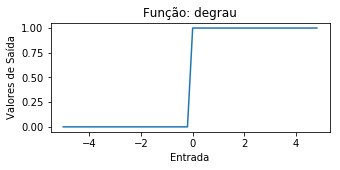

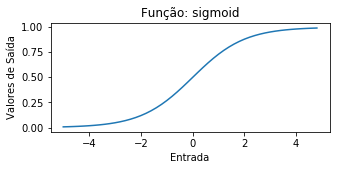

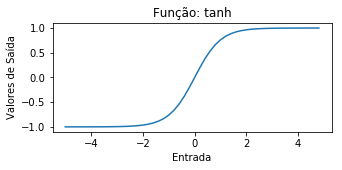

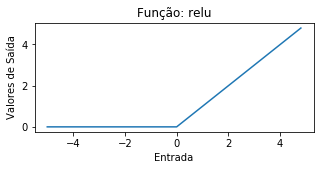

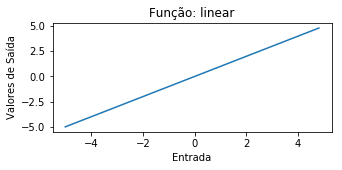

In [50]:
def activation_func(func_type, z):
    """
    Função que implementa as funções de ativação mais comuns
    Parãmetros: func_type - uma string que contém a função de ativação desejada
                z - vetor com os valores de entrada X multiplicado pelos pesos
    Retorna: saída da função de ativação
    """
    if func_type == 'sigmoid':
        return 1/(1 + np.exp(-z))
    elif func_type == 'tanh':
        return math.sinh(z)/math.cosh(z)
    elif func_type == 'relu':
        return 0 if (z<0) else z
    elif func_type == 'linear':
        return z
    elif func_type == 'degrau':
        return 0 if (z < 0) else  1
    
def visualizeActivationFunc(z, func_type):
    pylab.rcParams['figure.figsize'] = (10.0, 5.0)
    z = np.arange(-5., 5., 0.2)
    func = []
    for i in range(len(z)):
        func.append(activation_func(func_type, z[i]))
    
    pylab.rcParams['figure.figsize'] = (5.0, 2.0)
    plt.plot(z,func)
    plt.title("Função: "+func_type)
    plt.xlabel('Entrada')
    plt.ylabel('Valores de Saída')
    plt.show()

# Testa as funções de ativação
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'degrau')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'sigmoid')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'tanh')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'relu')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'linear')

In [51]:
def forward(w,b,X):
    """
    Função que implementa a etapa forward propagate do neurônio
    Parâmetros: w - pesos
                b - bias
                X - entradas
    """
    z = np.dot(w,X)+b
    out = activation_func('relu', z)
    return out

# Teste: forward
x = (1, 1, 1)
w,b = weight_init(3)
print("X: ", x)
print("Pesos: ", w)
print("Bias: ", b)
print("Y: ", forward(w,b,x))

X:  (1, 1, 1)
Pesos:  [-0.01368418 -0.45389442 -0.23873818]
Bias:  0.24085971704123277
Y:  0


In [52]:
def predict(out):
    """
    Função que discretiza a saída
    Parâmetro: y - saída do neurònio
    """
    if out < 0:
        return 0
    elif out > 7:
        return 7
    else:
        return round(out)

# Teste: predict
print ("Entrada=1.1 -> Saida=", predict(1.1))
print ("Entrada=4.5 -> Saida=", predict(4.5))
print ("Entrada=70.0 -> Saida=", predict(70.0))

Entrada=1.1 -> Saida= 1
Entrada=4.5 -> Saida= 4
Entrada=70.0 -> Saida= 7


In [53]:
def perceptron(x, y, num_interaction, learning_rate):
    """
    Função que implementa o loop do treinamento 
    Parâmetros: x - entrada da rede 
                y - rótulos/labels
                num_interaction - quantidade de interações desejada para a rede convergir
                learning_rate - taxa de aprendizado para cálculo do erro
    """
    training_interation = []
    training_erro = []
    
    #Passo 1 - Inicie os pesos e bias (~1 linha)
    w,b = weight_init(len(x[0]))
    #Passo 2 - Loop por X interações
    for i in range(num_interaction):
        
        # Ajuda no calculo do erro médio quadrado
        erros_interacao = []
        
        for j in range(len(x)): # para cada exemplo
            
            # Passo 3 -  calcule a saída do neurônio (~1 linha)
            y_calc = predict(forward(w,b,x[j]))
            
            # Passo 4 - calcule o erro entre a saída obtida e a saída desejada nos rótulos/labels (~1 linha)
            erro = y[j] - y_calc  
            
            # Adiciona o erro quadrado dessa instancia
            erros_interacao.append(erro*erro)
            
            # Ajusta os pesos e bias
            for idx in range(len(w)):
                w[idx] = w[idx] + erro*learning_rate*x[j][idx]            

            b = b + erro*learning_rate
        
        # Calcula o erro médio dessa interação
        erro_medio = np.average(erros_interacao)
        
        training_interation.append(i)
        training_erro.append(erro_medio) 
        
        # Apenas para garantir que pare quando o erro atingir um valor limite mínimo
        if (erro_medio < 0.00001):
            print("Finalizado na interação %d visto que o erro médio já se tornou muito pequeno %f" % (i, erro_medio))
            break;
    
    # Cria um grafico com os dados sobre o erro de treinamento
    pylab.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.plot(training_interation, training_erro)
    plt.xlabel('Interação')
    plt.ylabel('Erro médio quadrado')
    plt.show()
    
    return w,b

def validar(w,b,x,y):

    # Preenche o array de saidas preditas
    y_pred = []
    for j in range(len(x)):
        y_pred.append(predict(forward(w,b,x[j])))
       
    # Métricas de Avaliação
    print('Matriz de Confusão:')
    print(confusion_matrix(y, y_pred))
    print('F1 Score:')
    print(classification_report(y, y_pred))


### Criação dos Datasets de Treinamento e Validação

In [54]:
X_train, Y_train = criaDataset(800, 0.1)
X_val, Y_val = criaDataset(200, 0.1)

### Trainamento do Perceptron

Finalizado na interação 80 visto que o erro médio já se tornou muito pequeno 0.000000


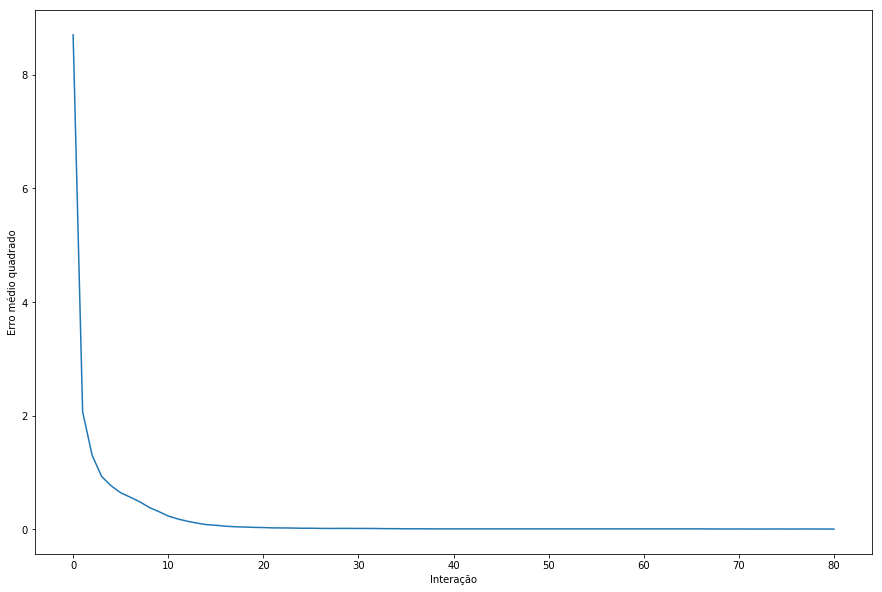

Pesos Aprendidos: [ 3.54315148  1.99031727  1.00881131] 
Bias Aprendido: 0.236690331863


In [58]:
w, b = perceptron(X_train, Y_train, 1000, 0.001)
print("Pesos Aprendidos:", w, "\nBias Aprendido:", b)

## Resultados

#### Conjunto de Treinamento

In [59]:
validar(w, b, X_train, Y_train)

Matriz de Confusão:
[[100   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0]
 [  0   0   0   0 100   0   0   0]
 [  0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0 100]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       100
          1       1.00      1.00      1.00       100
          2       1.00      1.00      1.00       100
          3       1.00      1.00      1.00       100
          4       1.00      1.00      1.00       100
          5       1.00      1.00      1.00       100
          6       1.00      1.00      1.00       100
          7       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       800



#### Conjunto de Validação

In [60]:
validar(w, b, X_val, Y_val)

Matriz de Confusão:
[[25  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 25]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00        25
          3       1.00      1.00      1.00        25
          4       1.00      1.00      1.00        25
          5       1.00      1.00      1.00        25
          6       1.00      1.00      1.00        25
          7       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00       200

